# Big Data Project
### Taylor Rohrich (trr2as) Alex Stern (acs4wq) Chirag Kulkarni (ck3fz)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

## Part 1: Data Exploration

### This part is the one part done in Pandas just because of the simple API available -- all other work data preprocessing is done in PySpark

In [33]:
prices = pd.read_csv('prices_response.csv')
fundamentals = pd.read_csv('fundamentals.csv')

In [34]:
prices['date']= pd.to_datetime(prices["date"])

In [35]:
prices['quarter'] = prices['date'].dt.quarter
prices['year']=prices['date'].dt.year
prices['dayofweek']= prices['date'].dt.weekday
prices['month']= prices['date'].dt.month
prices['dayofmonth']= prices['date'].dt.day

In [36]:
cal = calendar()
holidays = cal.holidays()
prices['isholiday'] = prices['date'].isin(holidays).replace({True:1,False:0})
prices = prices.loc[~prices['futurePrice'].isna()]

In [37]:
fundamentals.drop(columns=[fundamentals.columns[0]],inplace=True)
fundamentals.columns=fundamentals.columns.map(lambda x: "_".join(x.lower().replace(".","_").split(" ")))
fundamentals = fundamentals.rename(columns={'ticker_symbol':'symbol','sales,_general_and_admin_':'sales_general_and_admin_'})
fundamentals['date']= pd.to_datetime(fundamentals["period_ending"])
fundamentals['quarter'] = fundamentals['date'].dt.quarter
fundamentals['year']=fundamentals['date'].dt.year
fundamentals.drop(columns=['date'],inplace=True)

In [38]:
combined = prices.merge(fundamentals,on=['symbol','year','quarter'],how='left')

In [39]:
combined.to_csv('stocks.csv',index=False)

### Number of Records

In [28]:
len(combined)

NameError: name 'combined' is not defined

### Number of Columns

In [12]:
len(combined.columns)

86

### Statistical Summary of Response Variable

In [13]:
response = combined['close']
response.describe()

count    851264.000000
mean         65.011913
std          75.201216
min           1.590000
25%          31.292776
50%          48.480000
75%          75.139999
max        1578.130005
Name: close, dtype: float64

### Statistical Summary of (Top 10) Predictor Variables

In [14]:
selectedCols = ['date', 'symbol', 'open', 'volume',
       'year','cash_ratio','accounts_payable','gross_profit','net_income','long-term_debt']

In [15]:
parsed =combined[selectedCols]

#### Numerical Columns

In [16]:
parsed.describe()

,open,volume,year,cash_ratio,accounts_payable,gross_profit,net_income,long-term_debt
count,851264.000000,8.512640e+05,851264.000000,92343.000000,1.105870e+05,1.105870e+05,1.105870e+05,1.105870e+05
mean,64.993618,5.415113e+06,2013.050484,74.118352,4.720886e+09,7.245806e+09,1.726976e+09,8.623500e+09
std,75.203893,1.249468e+07,2.001677,102.086434,1.418720e+10,1.367024e+10,4.031062e+09,2.778930e+10
min,1.660000,0.000000e+00,2010.000000,0.000000,0.000000e+00,-1.264700e+10,-2.352800e+10,0.000000e+00
25%,31.270000,1.221500e+06,2011.000000,17.000000,5.408000e+08,1.599800e+09,3.568000e+08,1.150100e+09
50%,48.459999,2.476250e+06,2013.000000,41.000000,1.354000e+09,3.010000e+09,6.929570e+08,3.401500e+09
75%,75.120003,5.222500e+06,2015.000000,90.000000,3.247000e+09,6.956200e+09,1.719000e+09,7.873667e+09
max,1584.439941,8.596434e+08,2016.000000,1041.000000,2.069390e+11,1.494530e+11,5.339400e+10,4.291940e+11


#### Categorical Column

In [98]:
combined['symbol'].value_counts()

C       1762
AIG     1762
PEG     1762
PHM     1762
IDXX    1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

### Helpful Graphs

#### Correlation Matrix of the Top 10 Predictors

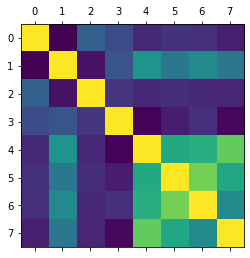

In [99]:
plt.matshow(parsed.corr())
plt.show()

#### Histogram of Gross Profit

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([6.4000e+01, 6.1433e+04, 3.3246e+04, 7.6180e+03, 2.7120e+03,
        2.1580e+03, 6.3700e+02, 3.7900e+02, 3.8100e+02, 4.4400e+02,
        3.8000e+02, 3.2000e+02, 1.2800e+02, 2.5400e+02, 0.0000e+00,
        6.0000e+01, 1.8300e+02, 6.4000e+01, 6.4000e+01, 6.2000e+01]),
 array([-1.26470e+10, -4.54200e+09,  3.56300e+09,  1.16680e+10,
         1.97730e+10,  2.78780e+10,  3.59830e+10,  4.40880e+10,
         5.21930e+10,  6.02980e+10,  6.84030e+10,  7.65080e+10,
         8.46130e+10,  9.27180e+10,  1.00823e+11,  1.08928e+11,
         1.17033e+11,  1.25138e+11,  1.33243e+11,  1.41348e+11,
         1.49453e+11]),
 <a list of 20 Patch objects>)

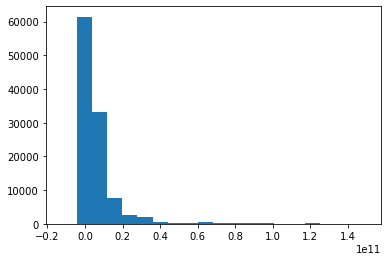

In [100]:
plt.hist(parsed['gross_profit'],bins=20)

### Average Open By Day

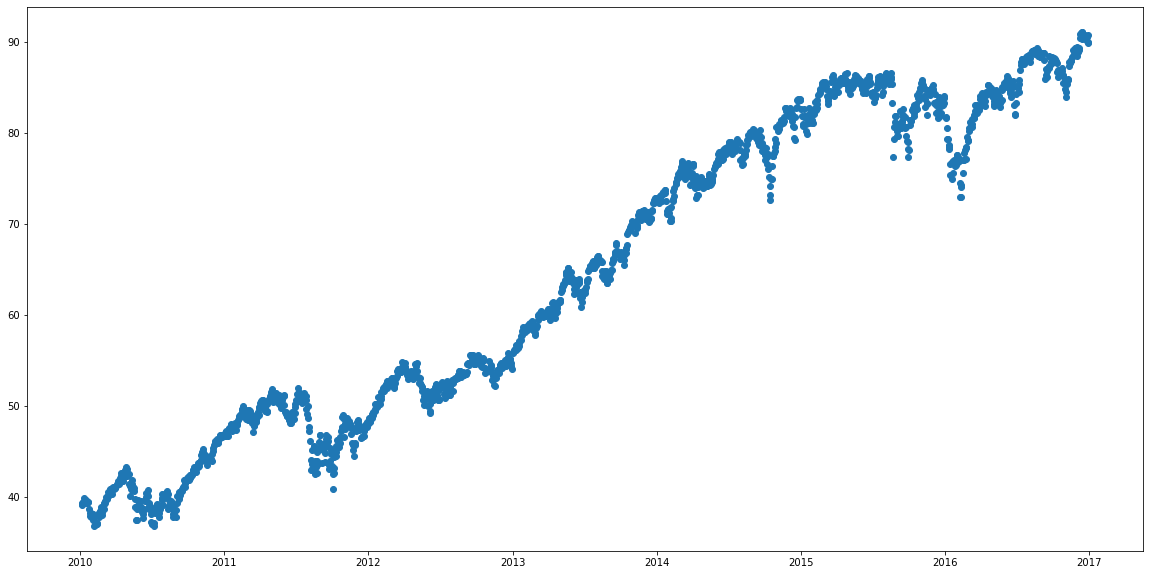

In [101]:
year_breakdown = combined.groupby(['date'])['open'].mean().reset_index()
plt.figure(figsize=(20,10))
plt.scatter(year_breakdown['date'],year_breakdown['open'])
plt.show()

### Specific Stocks

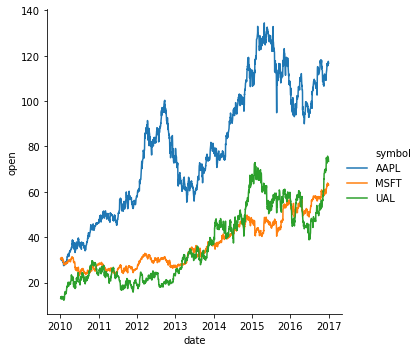

In [102]:
import seaborn as sns
sns.relplot(x='date', y='open', hue='symbol', kind='line', data=prices[prices['symbol'].isin(['AAPL', 'UAL', 'MSFT'])]);

### Average Net Income By Year Quarter

In [103]:
year_breakdown = combined.groupby(['year','quarter'])['net_income'].mean().reset_index()

In [104]:
x = year_breakdown['year'].astype(str)+ "Q" + year_breakdown['quarter'].astype(str)

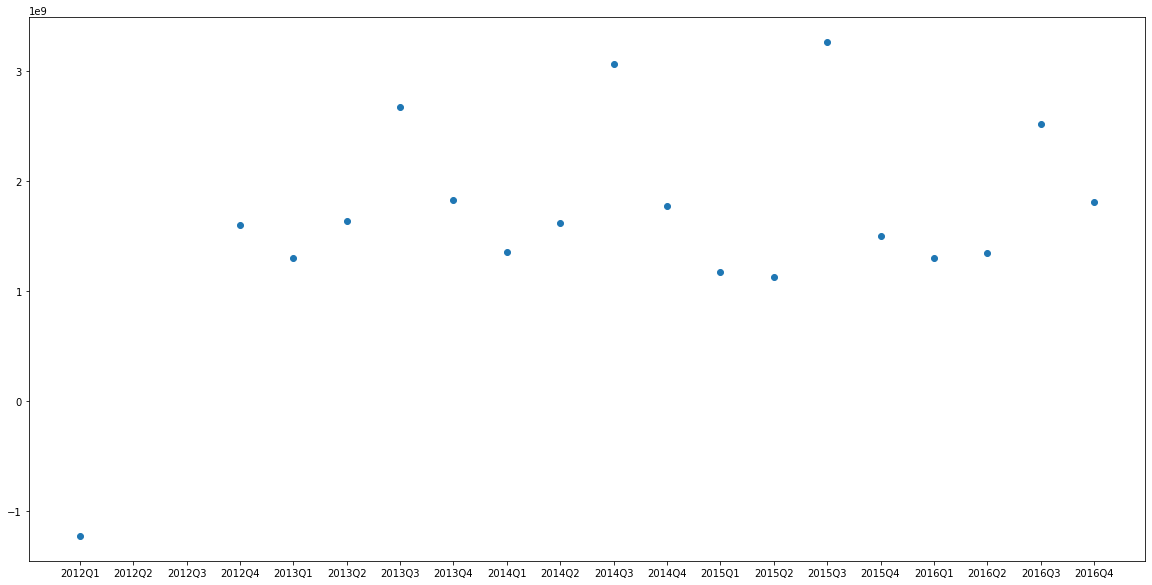

In [105]:
plt.figure(figsize=(20,10))
plt.scatter(x,year_breakdown['net_income'])
plt.show()

## Part 2: Data Preprocessing

In [1]:
from pyspark.mllib.stat import Statistics
from pyspark.sql import SparkSession
from pyspark.sql.functions import col 
from pyspark.ml.feature import StandardScaler,Bucketizer
from pyspark.sql.types import FloatType
from pyspark.sql.functions import isnan, when, count, col
from pyspark.ml import Pipeline,PipelineModel
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
# import data types
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
spark = SparkSession.builder.getOrCreate()

In [2]:
# read text file into pyspark dataframe
# schema = StructType([StructField(col, FloatType(), True) for col in combined.columns])

filename = 'stocks.csv'
df = spark.read.csv(filename, inferSchema=True, header = True)
# df = df.withColumn("date", df["date"].cast("int"))
# df = df.withColumn("period_ending", df["period_ending"].cast("float"))
df.cache()

DataFrame[date: timestamp, symbol: string, open: double, close: double, low: double, high: double, volume: double, dateLagged: timestamp, futurePrice: double, quarter: int, year: int, dayofweek: int, month: int, dayofmonth: int, isholiday: int, period_ending: timestamp, accounts_payable: double, accounts_receivable: double, add'l_income/expense_items: double, after_tax_roe: double, capital_expenditures: double, capital_surplus: double, cash_ratio: double, cash_and_cash_equivalents: double, changes_in_inventories: double, common_stocks: double, cost_of_revenue: double, current_ratio: double, deferred_asset_charges: double, deferred_liability_charges: double, depreciation: double, earnings_before_interest_and_tax: double, earnings_before_tax: double, effect_of_exchange_rate: double, equity_earnings/loss_unconsolidated_subsidiary: double, fixed_assets: double, goodwill: double, gross_margin: double, gross_profit: double, income_tax: double, intangible_assets: double, interest_expense: dou

#### Cast Columns to Different types

In [3]:
from pyspark.ml import Pipeline, Transformer
from pyspark.ml.util import DefaultParamsWritable,DefaultParamsReadable
# CUSTOM TRANSFORMER ----------------------------------------------------------------
class ChangeColumnType(Transformer, DefaultParamsWritable, DefaultParamsReadable):
    """
    A custom Transformer which drops all columns that have at least one of the
    words from the banned_list in the name.
    """

    def __init__(self,inputCols=None, outputCol=None):
        super(ChangeColumnType, self).__init__()
        self.inputCols = inputCols

    def _transform(self, df):
        for column, dataType in self.inputCols:
            df = df.withColumn(column, df[column].cast(dataType))
        return df

In [4]:
changeColumnType = ChangeColumnType(inputCols = [('date','int')])

#### Filling NA's

In [5]:
from pyspark.ml.feature import Imputer
missingCols = ['accounts_payable', 'accounts_receivable',
       "add'l_income/expense_items", 'after_tax_roe', 'capital_expenditures',
       'capital_surplus', 'cash_ratio', 'cash_and_cash_equivalents',
       'changes_in_inventories', 'common_stocks', 'cost_of_revenue',
       'current_ratio', 'deferred_asset_charges', 'deferred_liability_charges',
       'depreciation', 'earnings_before_interest_and_tax',
       'earnings_before_tax', 'effect_of_exchange_rate',
       'equity_earnings/loss_unconsolidated_subsidiary', 'fixed_assets',
       'goodwill', 'gross_margin', 'gross_profit', 'income_tax',
       'intangible_assets', 'interest_expense', 'inventory', 'investments',
       'liabilities', 'long-term_debt', 'long-term_investments',
       'minority_interest', 'misc__stocks', 'net_borrowings', 'net_cash_flow',
       'net_cash_flow-operating', 'net_cash_flows-financing',
       'net_cash_flows-investing', 'net_income', 'net_income_adjustments',
       'net_income_applicable_to_common_shareholders',
       'net_income-cont__operations', 'net_receivables', 'non-recurring_items',
       'operating_income', 'operating_margin', 'other_assets',
       'other_current_assets', 'other_current_liabilities', 'other_equity',
       'other_financing_activities', 'other_investing_activities',
       'other_liabilities', 'other_operating_activities',
       'other_operating_items', 'pre-tax_margin', 'pre-tax_roe',
       'profit_margin', 'quick_ratio', 'research_and_development',
       'retained_earnings', 'sale_and_purchase_of_stock',
       'sales_general_and_admin_',
       'short-term_debt_/_current_portion_of_long-term_debt',
       'short-term_investments', 'total_assets', 'total_current_assets',
       'total_current_liabilities', 'total_equity', 'total_liabilities',
       'total_liabilities_&_equity', 'total_revenue', 'treasury_stock',
       'for_year', 'earnings_per_share', 'estimated_shares_outstanding']
output = [f'{column}_out' for column in missingCols]
imputer = Imputer(inputCols=missingCols, outputCols=missingCols)
model = imputer.fit(df)

#### Convert String Ticker to Index

In [6]:
from pyspark.ml.feature import StringIndexer

In [7]:
indexer = StringIndexer(inputCol="symbol", outputCol="symbolIndex")
indexer.fit(df)

StringIndexer_583ed6dbdd2c

#### Create Response

In [8]:
from pyspark.ml import Pipeline, Transformer
from pyspark.sql.functions import udf
def stockImproved(s):
    return 1 if s > 0 else 0
# CUSTOM TRANSFORMER ----------------------------------------------------------------
class CreateResponseVariable(Transformer, DefaultParamsWritable, DefaultParamsReadable):
    """
    A custom Transformer which drops all columns that have at least one of the
    words from the banned_list in the name.
    """
    def __init__(self,inputCol=None, outputCol=None):
        super(CreateResponseVariable, self).__init__()

    def _transform(self, df):
        df= df.withColumn('difference',col('futurePrice')-col('close'))
        stockImproved_udf = udf(stockImproved)
        df = df.withColumn("label", stockImproved_udf('difference').cast('integer'))
        return df

In [9]:
responseVariable = CreateResponseVariable()

#### One Hot Encode

In [10]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
encoder = OneHotEncoder(inputCol="symbolIndex", outputCol="symbolVec")
# model = encoder.fit(indexed)
# encoded = model.transform(indexed)
# encoded.show()

#### Get Features

In [11]:
from pyspark.ml.feature import VectorAssembler
vars_to_keep = ["label",'open','close',
               'year','dayofweek','dayofmonth','month','date','symbolIndex','gross_profit','long-term_debt','close']
features = [column for column in vars_to_keep if column !='label']
getFeatures = VectorAssembler(inputCols=features, outputCol="features")

#### Train Test Split

In [12]:
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = df.randomSplit([0.7, 0.3])


## Part 3: Model Building

In [13]:
def getAccuracy(predictions):
    return predictions.rdd.map(lambda lp: (lp['label'] ==lp['prediction'])).sum() / predictions.count()

### 1. Gradient Boosted Tree

In [16]:
from pyspark.ml.classification import GBTClassifier
# Train a GBT model.
gbt = GBTClassifier(featuresCol="features",labelCol = 'label', maxIter=10)

# Chain indexer and GBT in a Pipeline
pipeline = Pipeline(stages=[changeColumnType,imputer,indexer,responseVariable,encoder,getFeatures,gbt])

# # Train model.  This also runs the indexer.
# model = pipeline.fit(trainingData)

# # Make predictions.
# predictions = model.transform(testData)

In [15]:
# import pyspark.sql.functions as F
# from pyspark.mllib.evaluation import MulticlassMetrics
# from pyspark.sql.types import FloatType
# #important: need to cast to float type, and order by prediction, else it won't work
# preds_and_labels = predictions.select(['prediction','stockImproved']).withColumn('label', F.col('stockImproved').cast(FloatType())).orderBy('prediction')

# #select only prediction and label columns
# preds_and_labels = preds_and_labels.select(['prediction','label'])

# metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))

# print(metrics.confusionMatrix().toArray())

NameError: name 'predictions' is not defined

### Parameter Tuning

In [20]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, TrainValidationSplit
from pyspark.ml.evaluation import BinaryClassificationEvaluator
# Set up the parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(gbt.maxBins, [550, 700]) \
    .addGrid(gbt.maxDepth,[5,10]) \
    .build()

print('len(paramGrid): {}'.format(len(paramGrid)))

# Treat the Pipeline as an Estimator, wrapping it in a CrossValidator instance.
trainval =  TrainValidationSplit(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator()
                         )


len(paramGrid): 4


In [21]:
# Run cross-validation, and choose the best set of parameters. Print the training time.
import time
t0 = time.time()

bestRandomForestModel = trainval.setParallelism(4).fit(trainingData) # train 4 models in parallel
print("train time:", time.time() - t0)

# Make predictions on test documents. cvModel uses the best model found (lrModel).
prediction = bestRandomForestModel.transform(testData)

train time: 624.3759710788727


In [23]:
#https://stackoverflow.com/questions/51230726/extract-results-from-crossvalidator-with-paramgrid-in-pyspark
params = [{p.name: v for p, v in m.items()} for m in bestRandomForestModel.getEstimatorParamMaps()]

In [25]:
import pandas as pd

pd.DataFrame.from_dict([
    {bestRandomForestModel.getEvaluator().getMetricName(): metric, **ps} 
    for ps, metric in zip(params, bestRandomForestModel.validationMetrics)
])

,areaUnderROC,maxBins,maxDepth
0,0.731846,550,5
1,0.845648,550,10
2,0.738461,700,5
3,0.831500,700,10


### Run Best Model

In [26]:
predictions = bestRandomForestModel.transform(testData)
getAccuracy(predictions)

0.759914496029297

In [ ]:
# save best model
bestRandomForestModel.save("tmp/best-tree-model")

### Size

In [97]:
!du -sh tmp/best-tree-model

1.4M	tmp/best-tree-model


In [95]:
pipelineModel = Pipeline.load("tmp/best-tree-model")

### 2. Logistic Regression

In [29]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol="features",labelCol = 'label')

pipeline = Pipeline(stages=[changeColumnType,imputer,indexer,responseVariable,encoder,getFeatures,lr])


In [30]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
# Set up the parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(lr.maxIter, [10,20, 30]) \
    .addGrid(lr.elasticNetParam,[0.1,0.5,0.9]) \
    .build()

print('len(paramGrid): {}'.format(len(paramGrid)))

# Treat the Pipeline as an Estimator, wrapping it in a CrossValidator instance.
trainVal = TrainValidationSplit(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator())


len(paramGrid): 9


In [31]:
# Run cross-validation, and choose the best set of parameters. Print the training time.
import time
t0 = time.time()

bestLrModel = trainVal.setParallelism(4).fit(trainingData) # train 4 models in parallel
print("train time:", time.time() - t0)



train time: 475.09101152420044


In [33]:
import pandas as pd
#https://stackoverflow.com/questions/51230726/extract-results-from-crossvalidator-with-paramgrid-in-pyspark
params = [{p.name: v for p, v in m.items()} for m in bestLrModel.getEstimatorParamMaps()]
pd.DataFrame.from_dict([
    {bestLrModel.getEvaluator().getMetricName(): metric, **ps} 
    for ps, metric in zip(params, bestLrModel.validationMetrics)
])

,areaUnderROC,maxIter,elasticNetParam
0,0.517932,10,0.1
1,0.517932,10,0.5
2,0.517932,10,0.9
3,0.517905,20,0.1
4,0.517905,20,0.5
5,0.517905,20,0.9
6,0.518338,30,0.1
7,0.518338,30,0.5
8,0.518338,30,0.9


In [34]:
# Make predictions on test documents. cvModel uses the best model found (lrModel).
prediction = bestLrModel.transform(testData)
getAccuracy(prediction)

0.5764120212370283

### Model 3: Chirag

## Sensitivity Analysis

In [44]:
from pyspark.ml import Pipeline, Transformer
from pyspark.sql.functions import udf
def stockImproved(s):
    return 1 if s > 0 else 0
# CUSTOM TRANSFORMER ----------------------------------------------------------------
class SensitivityAnalysis(Transformer, DefaultParamsWritable, DefaultParamsReadable):
    """
    A custom Transformer which drops all columns that have at least one of the
    words from the banned_list in the name.
    """
    def __init__(self,inputCol=None, outputCol=None):
        super(SensitivityAnalysis, self).__init__()
        self.inputCol = inputCol

    def _transform(self, df):
        df_stats = df.select(
        _mean(col(self.inputCol)).alias('mean'),
        _stddev(col(self.inputCol)).alias('std')
            ).collect()
        std = df_stats[0]['std']
        df = df.withColumn(self.inputCol,col(self.inputCol)+ std)
        return df

In [48]:
sensitivity = SensitivityAnalysis('gross_profit')

In [55]:
# Recreate Best Pipelines but with Sensitivity Analysis
bestBt = GBTClassifier(featuresCol="features",labelCol = 'label', maxIter=10,maxBins=550,maxDepth=10)
pipelineBt = Pipeline(stages=[changeColumnType,imputer,indexer,sensitivity,responseVariable,encoder,getFeatures,bestBt])
bestLr = LogisticRegression(featuresCol="features",labelCol = 'label',elasticNetParam = 0.5, maxIter=30)
pipelineLr = Pipeline(stages=[changeColumnType,imputer,indexer,sensitivity,responseVariable,encoder,getFeatures,bestLr])


In [58]:
bestBtModel = pipelineBt.fit(trainingData)

In [59]:
# Make predictions on test documents. cvModel uses the best model found (lrModel).
prediction = bestBtModel.transform(testData)
getAccuracy(prediction)

0.7596978750710149

In [ ]:
bestLrModel = pipelineLr.fit(trainingData)

In [ ]:
# Make predictions on test documents. cvModel uses the best model found (lrModel).
prediction = bestLrModel.transform(testData)
getAccuracy(prediction)

In [98]:
# Save notebook as PDF document
!jupyter nbconvert --to pdf `pwd`/*.ipynb

[NbConvertApp] Converting notebook /sfs/qumulo/qhome/trr2as/ds5559/project/big_data_cleaning.ipynb to pdf
[NbConvertApp] Support files will be in big_data_cleaning_files/
[NbConvertApp] Making directory ./big_data_cleaning_files
[NbConvertApp] Making directory ./big_data_cleaning_files
[NbConvertApp] Making directory ./big_data_cleaning_files
[NbConvertApp] Making directory ./big_data_cleaning_files
[NbConvertApp] Making directory ./big_data_cleaning_files
[NbConvertApp] Writing 67678 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 144370 bytes to /sfs/qumulo/qhome/trr2as/ds5559/project/big_data_cleaning.pdf
[NbConvertApp] Converting notebook /sfs/qumulo/qhome/trr2as/ds5559/project/lag_model